In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# plotly is a visualisation library
# cufflinks connects plotly with pandas    
# plotly and cufflinks are used for 3-D visualisations

In [3]:
import plotly

In [4]:
from plotly import __version__

In [5]:
print(__version__)

3.10.0


In [6]:
import cufflinks as cf

In [7]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [8]:
init_notebook_mode(connected=True)

In [9]:
cf.go_offline()

In [10]:
# Lets create dataframe
df = pd.DataFrame(np.random.randn(100,4),columns='A B C D'.split())

In [11]:
df.head()

,A,B,C,D
0,1.675680,-0.484365,-0.794623,2.328651
1,0.850065,-0.776866,0.883794,-1.463250
2,1.557229,-0.012121,0.592517,0.604463
3,0.263850,-0.586177,-1.080607,1.461173
4,-0.817760,2.422669,0.107246,0.378635


In [12]:
df2 = pd.DataFrame({'category':['A','B','C'],'values':[32,43,5]})

In [13]:
df2

,category,values
0,A,32
1,B,43
2,C,5


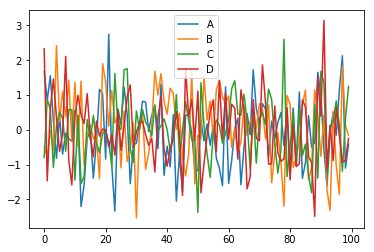

In [14]:
df.plot()

In [15]:
# df.iplot() : gives plot where we can place the cursor to actually see the value at a particular point.
# we can also play with the plot using the options given at top right of the plot.
df.iplot()

In [16]:
# using scatter plot with iplot by mentioning the kind='scatter' value.
df.iplot(kind='scatter',x='A',y='B', mode='markers',size=10)
# mode = , is used to change the marker style.

In [17]:
# using bar plot
df2.iplot(kind='bar',x='category',y='values')

In [18]:
df.iplot(kind='bar') # it will just display bars for very value.


In [19]:
# so we have to add an aggregate funtion to make chart more understandable.
df.sum().iplot(kind='bar')  # now, it will give sum() of all columns

In [20]:
# box plots
df.iplot(kind='box')
# we can switch off and on columns by mentioning the columns or clicking on the col_names in the key table.

# 3-D plots

In [21]:
df3 = pd.DataFrame({'x':[1,2,3,4,5],'y':[10,20,30,20,10],'z':[5,4,3,2,1]})

In [22]:
df3

,x,y,z
0,1,10,5
1,2,20,4
2,3,30,3
3,4,20,2
4,5,10,1


In [23]:
df3.iplot(kind='surface',colorscale='rdylbu') 
# to change color scale use : colorscale='rdylbu'

In [24]:
df['A'].iplot(kind='hist')

In [25]:
df.iplot(kind='hist') # when particular columns is not mentioned,it gives hist plot of all columns overlapping.
# we can switch off and on the columns.

In [26]:
# spread plot : it shows two plots at the same time. used for stocks comparison.
df.iplot(kind='spread')

In [27]:
# bubble plot
df.iplot(kind='bubble',x='A',y='B',size='C',color='red')
# plots for GDP,population,etc

# Scatter matrix plot : similar to pairplot.
df1.scatter_matrix()

In [28]:
# find the error and solve the problem.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BEB90CD518>,
      dtype=object)

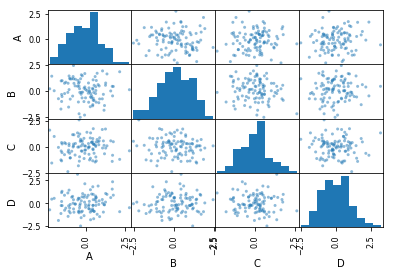

In [29]:
pd.plotting.scatter_matrix(frame=df)

# GEOGRAPHICAL PLOTTING

### CHOROPLETH MAPS

In [34]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
from plotly.offline import init_notebook_mode,plot,iplot

In [35]:
init_notebook_mode(connected=True)

In [36]:
data1 = dict( type='choropleth',
              locations = ['AZ','CA','NY'],    # list of states abbreviations.
              locationmode = 'USA-states',     # country name
              colorscale='Portland',             # color
              text = ['T1','T2','T3'],                       # what text hovers over each state
               z= [1.0,2.0,3.0],                          # values to be shown in colorscale   
               colorbar = {'title':'colorbar title is here'} )

In [37]:
data1     # dict(): helps to create dictionaries.

{'type': 'choropleth',
 'locations': ['AZ', 'CA', 'NY'],
 'locationmode': 'USA-states',
 'colorscale': 'Portland',
 'text': ['T1', 'T2', 'T3'],
 'z': [1.0, 2.0, 3.0],
 'colorbar': {'title': 'colorbar title is here'}}

In [38]:
layout1 = dict(geo={'scope':'usa'})

In [39]:
go.Figure(data=[data1],layout=layout1)

Figure({
    'data': [{'colorbar': {'title': {'text': 'colorbar title is here'}},
              'colorscale': 'Portland',
              'locationmode': 'USA-states',
              'locations': [AZ, CA, NY],
              'text': [T1, T2, T3],
              'type': 'choropleth',
              'uid': 'dd992c6f-35f3-4a07-b504-413be62adaa9',
              'z': [1.0, 2.0, 3.0]}],
    'layout': {'geo': {'scope': 'usa'}}
})

In [40]:
df4 = pd.read_csv('2011_US_AGRI_Exports')

In [41]:
df4.head()

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton,text
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61,Alabama<br>Beef 34.4 Dairy 4.06<br>Fruits 25.1...
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.00,0.6,1.0,1.56,0.0,0.0,0.00,Alaska<br>Beef 0.2 Dairy 0.19<br>Fruits 0.0 Ve...
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95,Arizona<br>Beef 71.3 Dairy 105.48<br>Fruits 60...
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44,Arkansas<br>Beef 53.2 Dairy 3.53<br>Fruits 6.8...
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.40,803.2,1303.5,2106.79,34.6,249.3,1064.95,California<br>Beef 228.7 Dairy 929.95<br>Frui...


In [42]:
data2 = dict( type='choropleth',
              locations = df4['code'],
              colorscale = 'Portland',
              locationmode = 'USA-states',
              text = df4['text'],
               z = df4['total exports'],
               marker = dict(line=dict(color='white',width=2)),  # marker(line=dict(color=,width=)) : line b/w states.
               colorbar ={'title':'millions usd'})

            

In [43]:
layout2 = dict(title = 'USA EXPORTS',
                geo = dict(scope = 'usa',showlakes=True,lakecolor='blue'))

In [44]:
layout2

{'title': 'USA EXPORTS',
 'geo': {'scope': 'usa', 'showlakes': True, 'lakecolor': 'blue'}}

In [45]:
chromomap2 =go.Figure(data=[data2],layout=layout2)
iplot(chromomap2)

# International level

In [46]:
df = pd.read_csv('2014_World_GDP')

In [47]:
df.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


In [48]:
data5 = dict(type='choropleth',
             locations=df['CODE'],
             z=df['GDP (BILLIONS)'],
             colorscale='Portland',
             text=df['COUNTRY'],
             colorbar={'title':'BILLIONS USD'})

In [49]:
layout5 = dict(
    title = '2014 Global GDP',
    geo = dict(showframe = False,projection={'type': 'natural earth'}))

In [50]:
chromomap3=go.Figure(data=[data5],layout=layout5)

In [51]:
iplot(chromomap3)

In [ ]:
# plotly/python/reference   # for all plotly maps ,charts , iplots and what arguments we can add.